# **Data Wrangling**

In [2]:
# Printing current working directory
import os

cwd = os.getcwd()
dir_list = os.listdir()
print("Files and directories in '", cwd, "' :")
print(dir_list)

Files and directories in ' C:\Users\becke\OneDrive\Documents\Jupyter Notebooks\Springboard\Capstone Three\Notebooks ' :
['.ipynb_checkpoints', 'Capstone Three- Data Wrangling and EDA.ipynb', 'Capstone Three- Pre-processing and Modeling.ipynb']


In [3]:
# Change to desired directory
from pathlib import Path

path = Path(r"C:\Users\becke\OneDrive\Documents\Jupyter Notebooks\Springboard\Capstone Three\data")
os.chdir(path)

cwd = os.getcwd()
dir_list = os.listdir()
print("Files and directories in '", cwd, "' :")
print(dir_list)

Files and directories in ' C:\Users\becke\OneDrive\Documents\Jupyter Notebooks\Springboard\Capstone Three\data ' :
['training_data_cleaned.csv', 'twitter_training.csv', 'twitter_validation.csv', 'validation_data_cleaned.csv']


In [4]:
# Import libraries and load in data with profile report
import pandas as pd
from ydata_profiling import ProfileReport

training = pd.read_csv('twitter_training.csv', names=['Tweet ID', 'entity', 'sentiment', 'Tweet content'])
validation = pd.read_csv('twitter_validation.csv', names=['Tweet ID', 'entity', 'sentiment', 'Tweet content'])
df = pd.concat([training, validation])

profile = ProfileReport(df, title="Profiling Report")

In [5]:
# Examine profile report
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The above profile report, although not able to be seen when displayed in GitHub, includes metrics regarding the dataset.
General information and summary statistics for each column are displayed.
This information answers numerous questions regarding data quality.
Since this was a highly rated dataset on Kaggle, the only information that needed our attention regarding data quality was the missing values in Tweet content and possible duplicate rows.
The missing data and duplicate rows will be dropped since they account for a small percentage of the total data.

In [7]:
# Gather information on missing values and data types
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       1000 non-null   int64 
 1   entity         1000 non-null   object
 2   sentiment      1000 non-null   object
 3   Tweet content  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [9]:
# Calculate percent of missing Tweet content data in training DataFrame
print(f"{(training['Tweet content'].isna().sum() / training.shape[0]):.2%}")

0.92%


In [10]:
# Drop NaN values
training.dropna(inplace=True)

In [11]:
# Verify results
training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       73996 non-null  int64 
 1   entity         73996 non-null  object
 2   sentiment      73996 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [12]:
# Checking for duplicate values
training[training.duplicated(keep=False)].sort_values('Tweet ID')

,Tweet ID,entity,sentiment,Tweet content
4664,1,Amazon,Negative,@ amazon wtf.
4663,1,Amazon,Negative,@ amazon wtf.
4742,14,Amazon,Neutral,Comfy Deluxe Pants Waist Extenders by Comfy Cl...
4741,14,Amazon,Neutral,Comfy Deluxe Pants Waist Extenders by Comfy Cl...
4796,23,Amazon,Neutral,buff.ly / 33Q7U7s.....
...,...,...,...,...
11559,13186,Xbox(Xseries),Positive,.
11560,13186,Xbox(Xseries),Positive,.
11561,13186,Xbox(Xseries),Positive,.
11568,13188,Xbox(Xseries),Neutral,What da hell this mean in english


In [13]:
validation[validation.duplicated(keep=False)].sort_values('Tweet ID')

,Tweet ID,entity,sentiment,Tweet content


In [14]:
# Calculate percent of duplicate rows in training DataFrame
print(f"{(training.duplicated().sum() / df.shape[0]):.2%}")

3.09%


In [15]:
# Dropping duplicates
training.drop_duplicates(inplace=True)

In [16]:
# Verifying results
training.duplicated().sum()

0

In [17]:
# Drop unneeded columns, set new column names, drop missing values
training.drop(columns = ['Tweet ID', 'entity'], axis=0, inplace=True)
training.columns = ['Label', 'Content']
training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71656 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    71656 non-null  object
 1   Content  71656 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [18]:
validation.drop(columns = ['Tweet ID', 'entity'], axis=0, inplace=True)
validation.columns = ['Label', 'Content']
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    1000 non-null   object
 1   Content  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


# **Exploratory Data Analysis (EDA)**

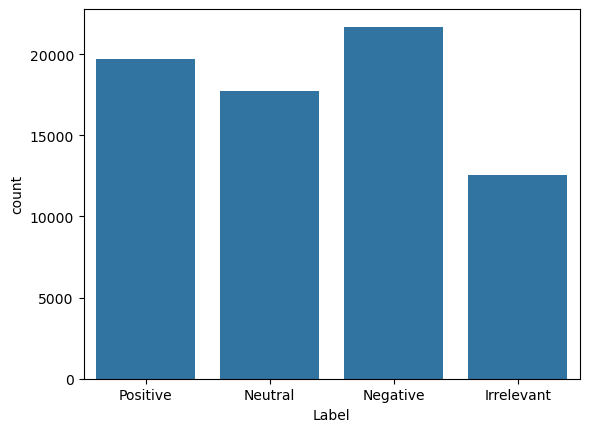

In [20]:
# Content column cannot be explored by a histogram
import seaborn as sns
%matplotlib inline

sns.countplot(x = 'Label', data=training);

In [21]:
# Saving data to new csv files
training.to_csv('training_data_cleaned.csv', index=False)
validation.to_csv('validation_data_cleaned.csv', index=False)